In [1]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from pandas import read_csv, DataFrame, Series

In [2]:
X = pd.read_csv('heart_pandas (2).csv')

In [3]:
X.head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null object
chest_pain_type            303 non-null object
resting_blood_pressure     303 non-null int64
cholesterol                303 non-null int64
fasting_blood_sugar        303 non-null object
rest_ecg                   303 non-null object
max_heart_rate_achieved    303 non-null int64
exercise_induced_angina    303 non-null object
st_depression              303 non-null float64
st_slope                   303 non-null object
num_major_vessels          303 non-null int64
thalassemia                303 non-null object
target                     303 non-null int64
dtypes: float64(1), int64(6), object(7)
memory usage: 24.9+ KB


In [5]:
X.select_dtypes(include='object')

,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_slope,thalassemia
0,male,non-anginal pain,greater than 120mg/ml,normal,no,upsloping,normal
1,male,atypical angina,lower than 120mg/ml,ST-T wave abnormality,no,upsloping,fixed defect
2,female,typical angina,lower than 120mg/ml,normal,no,flat,fixed defect
3,male,typical angina,lower than 120mg/ml,ST-T wave abnormality,no,flat,fixed defect
4,female,typical angina,lower than 120mg/ml,ST-T wave abnormality,yes,flat,fixed defect
5,male,typical angina,lower than 120mg/ml,ST-T wave abnormality,no,upsloping,normal
6,female,typical angina,lower than 120mg/ml,normal,no,upsloping,fixed defect
7,male,typical angina,lower than 120mg/ml,ST-T wave abnormality,no,flat,reversable defect
8,male,atypical angina,greater than 120mg/ml,ST-T wave abnormality,no,flat,reversable defect
9,male,atypical angina,lower than 120mg/ml,ST-T wave abnormality,no,flat,fixed defect


In [6]:
qq = pd.get_dummies(X, columns= X.select_dtypes(include='object').columns)

In [7]:
y = qq['target']
w = qq.drop(columns=['target'])

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
q = LogisticRegression()
q.fit(w,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
w.head(5)

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_female,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,...,rest_ecg_ST-T wave abnormality,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,0,1,0,1,...,0,0,1,1,0,0,1,0,1,0
1,37,130,250,187,3.5,0,0,1,1,0,...,1,0,0,1,0,0,1,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,...,1,0,0,0,1,1,0,1,0,0


In [11]:
pred = q.predict_proba(w)

In [12]:
print(pred)

[[0.36050217 0.63949783]
 [0.15589824 0.84410176]
 [0.07627396 0.92372604]
 [0.08990087 0.91009913]
 [0.12603572 0.87396428]
 [0.3702457  0.6297543 ]
 [0.27742574 0.72257426]
 [0.27798596 0.72201404]
 [0.15795476 0.84204524]
 [0.04049952 0.95950048]
 [0.19348042 0.80651958]
 [0.0173583  0.9826417 ]
 [0.12414317 0.87585683]
 [0.36368568 0.63631432]
 [0.02806858 0.97193142]
 [0.0312296  0.9687704 ]
 [0.00790033 0.99209967]
 [0.16948731 0.83051269]
 [0.21230887 0.78769113]
 [0.11515429 0.88484571]
 [0.57804046 0.42195954]
 [0.05429014 0.94570986]
 [0.08671973 0.91328027]
 [0.30508097 0.69491903]
 [0.29566536 0.70433464]
 [0.26431274 0.73568726]
 [0.05779529 0.94220471]
 [0.05049005 0.94950995]
 [0.0804539  0.9195461 ]
 [0.13517679 0.86482321]
 [0.04256376 0.95743624]
 [0.38466852 0.61533148]
 [0.09728081 0.90271919]
 [0.27278195 0.72721805]
 [0.50833441 0.49166559]
 [0.1233975  0.8766025 ]
 [0.00768901 0.99231099]
 [0.32307574 0.67692426]
 [0.02285841 0.97714159]
 [0.0529066  0.9470934 ]


In [13]:
w.head(5)

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_female,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,...,rest_ecg_ST-T wave abnormality,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,0,1,0,1,...,0,0,1,1,0,0,1,0,1,0
1,37,130,250,187,3.5,0,0,1,1,0,...,1,0,0,1,0,0,1,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,...,1,0,0,0,1,1,0,1,0,0


In [14]:
b = abs(q.coef_[0])

In [15]:
print(b)

[0.00602169 0.01366095 0.0037459  0.02283359 0.44947375 0.81251761
 0.69350889 0.52924243 0.55536124 0.50381944 0.89491422 0.16570316
 0.0014367  0.38531444 0.07660079 0.14444719 0.53839281 0.37412635
 0.46438865 0.30012219 0.66940877 0.25783226 0.76297457]


In [16]:
indices = np.argsort(b)[::-1]

In [17]:
print(indices)

[10  5 22  6 20  8 16  7  9 18  4 13 17 19 21 11 15 14  3  1  0  2 12]


Рейтинг характеристик:
1. признак 10 (0.894914)
2. признак 5 (0.812518)
3. признак 22 (0.762975)
4. признак 6 (0.693509)
5. признак 20 (0.669409)
6. признак 8 (0.555361)
7. признак 16 (0.538393)
8. признак 7 (0.529242)
9. признак 9 (0.503819)
10. признак 18 (0.464389)
11. признак 4 (0.449474)
12. признак 13 (0.385314)
13. признак 17 (0.374126)
14. признак 19 (0.300122)
15. признак 21 (0.257832)
16. признак 11 (0.165703)
17. признак 15 (0.144447)
18. признак 14 (0.076601)
19. признак 3 (0.022834)
20. признак 1 (0.013661)
21. признак 0 (0.006022)
22. признак 2 (0.003746)
23. признак 12 (0.001437)


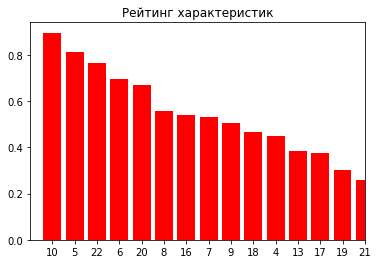

In [18]:
print("Рейтинг характеристик:")

for f in range(w.shape[1]):
    print("%d. признак %d (%f)" % (f + 1, indices[f], b[indices[f]]))
    
plt.figure()
plt.title("Рейтинг характеристик")
plt.bar(range(w.shape[1]), b[indices],
       color="r", align="center")
plt.xticks(range(w.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
ww = RandomForestClassifier()
ww.fit(w,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
pred2 = ww.predict_proba(w)

In [22]:
pred2

array([[0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0.1, 0.9],
       [0. , 1. ],
       [0. , 1. ],
       [0.3, 0.7],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0.3, 0.7],
       [0. , 1. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [0. , 1. ],
       [0.1, 0.9],
       [0. , 1. ],
       [0.1, 0.9],
       [0. , 1. ],
       [0.1, 0.9],
       [0.4, 0.6],
       [0. , 1. ],
       [0.3, 0.7],
       [0.2, 0.8],
       [0. , 1. ],
       [0.1, 0.9],
       [0. , 1. ],
       [0.1, 0.9],
       [0. , 1. ],
       [0.1, 0.9],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0.1, 0.9],
       [0. , 1. ],
       [0. , 1. ],
       [0.1, 0.9],
       [0.1, 0.9],
       [0.1, 0.9],
       [0. , 1. ],
       [0.2, 0.8],
       [0.1,

In [23]:
a = ww.feature_importances_

In [24]:
print(a)

[0.09030084 0.07913593 0.06748852 0.07522886 0.08795198 0.10611723
 0.02772319 0.01686465 0.03946361 0.02399774 0.02262166 0.00958738
 0.00593466 0.01190968 0.00086391 0.02123071 0.05177626 0.03810143
 0.01978903 0.04384561 0.08793432 0.01057631 0.06155647]


Рейтинг характеристик:
1. признак 5 (0.106117)
2. признак 0 (0.090301)
3. признак 4 (0.087952)
4. признак 20 (0.087934)
5. признак 1 (0.079136)
6. признак 3 (0.075229)
7. признак 2 (0.067489)
8. признак 22 (0.061556)
9. признак 16 (0.051776)
10. признак 19 (0.043846)
11. признак 8 (0.039464)
12. признак 17 (0.038101)
13. признак 6 (0.027723)
14. признак 9 (0.023998)
15. признак 10 (0.022622)
16. признак 15 (0.021231)
17. признак 18 (0.019789)
18. признак 7 (0.016865)
19. признак 13 (0.011910)
20. признак 21 (0.010576)
21. признак 11 (0.009587)
22. признак 12 (0.005935)
23. признак 14 (0.000864)


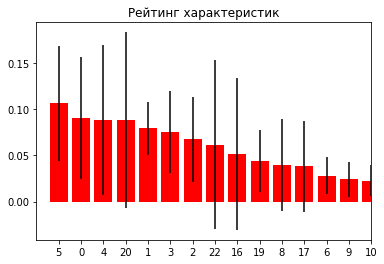

In [25]:
std = np.std([tree.feature_importances_ for tree in ww.estimators_],
             axis=0)
indices = np.argsort(a)[::-1]

print("Рейтинг характеристик:")

for f in range(w.shape[1]):
    print("%d. признак %d (%f)" % (f + 1, indices[f], a[indices[f]]))

plt.figure()
plt.title("Рейтинг характеристик")
plt.bar(range(w.shape[1]), a[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(w.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()